In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [3]:
pnl = pd.read_csv('pnl_12_24_12_05_05.csv')
pnl.columns = ['Date', 'pnl']

In [10]:
df = pd.read_csv('pnl_details_12_24_12_05_05.csv')
df1 = df[(~(df['lmv'] == 0.0)) & (df[df.columns[0]] < '2012-01-01')].copy()

# Daily Return

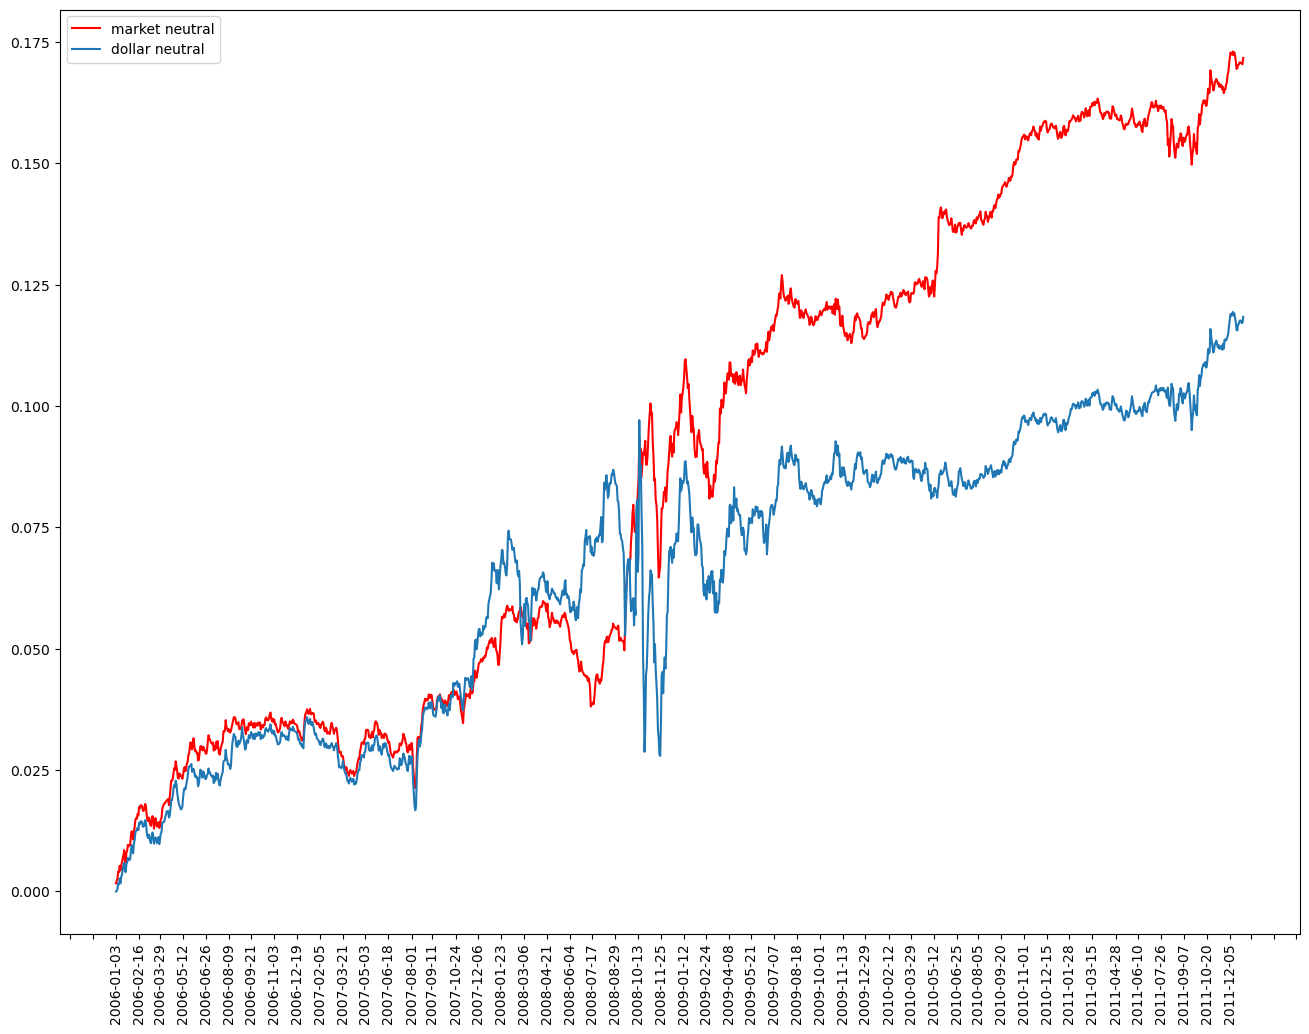

In [5]:
plt.figure(figsize=(16, 12))
plt.xticks(rotation=90)
plt.plot(df1[df1.columns[0]], df1['market_neutral_ret'].cumsum(), label='market neutral', color='r')
plt.plot(df1[df1.columns[0]], df1['dollar_neutral_ret'].cumsum(), label='dollar neutral')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.show()

In [6]:
df1['year'] = df1[df1.columns[0]].apply(lambda x: int(x[:4]))
grouped = df1.groupby('year').agg({'market_neutral_ret': 'sum', 
                         'dollar_neutral_ret': 'sum',
                         })
sigma = df1.groupby('year')['market_neutral_ret'].cumsum().std()
grouped['sigma'] = sigma

# Sharpe Ratio

In [8]:
r = 0.02
df2 = grouped.reset_index()
df2['market_neutral_sharpe'] = (df2['market_neutral_ret'] - r) / df2['sigma']
df2['dollar_neutral_sharpe'] = (df2['dollar_neutral_ret'] - r) / df2['sigma']
df2

,year,market_neutral_ret,dollar_neutral_ret,sigma,market_neutral_sharpe,dollar_neutral_sharpe
0,2006,0.031633,0.030201,0.013855,0.839587,0.736263
1,2007,0.020163,0.030590,0.013855,0.011768,0.764286
2,2008,0.044378,0.015081,0.013855,1.759482,-0.355004
3,2009,0.018914,0.010913,0.013855,-0.078394,-0.655875
4,2010,0.042150,0.009909,0.013855,1.598657,-0.728329
5,2011,0.014507,0.021703,0.013855,-0.396441,0.122900


In [9]:
print(df2[['year', 'market_neutral_sharpe', 'dollar_neutral_sharpe']])

   year  market_neutral_sharpe  dollar_neutral_sharpe
0  2006               0.839587               0.736263
1  2007               0.011768               0.764286
2  2008               1.759482              -0.355004
3  2009              -0.078394              -0.655875
4  2010               1.598657              -0.728329
5  2011              -0.396441               0.122900


# s-score

In [11]:
sscore = pd.read_csv('s_score_12_24_12_05_05.csv')

In [27]:
values = sscore.drop(columns=['DlyCalDt']).to_numpy().flatten()
valid_values = values[~np.isnan(values)]

In [30]:
valid_values.min()

-118.65253893094204

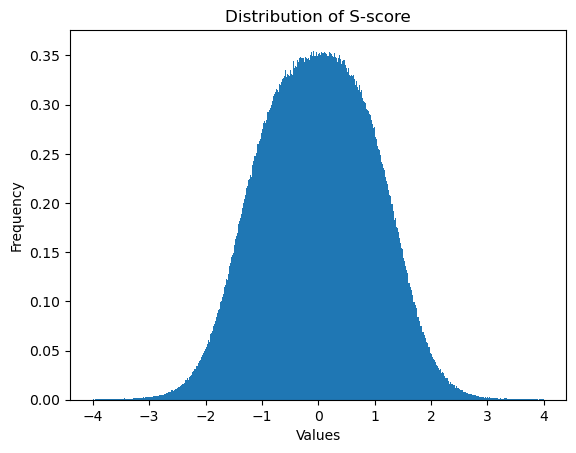

In [36]:
plt.hist(valid_values, bins=1000, density=True, range=(-4, 4))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of S-score')
plt.show()

In [37]:
from scipy.stats import kurtosis, skew
kurtosis_value = kurtosis(valid_values)
skewness_value = skew(valid_values)
print(f"Kurtosis: {kurtosis_value}")
print(f"Skewness: {skewness_value}")
print(f"Mean : {np.mean(valid_values)}")    

Kurtosis: 444.40982151106516
Skewness: -0.22819229681493314
Mean : -0.011241779597858778
